In [17]:
import pandas as pd
import numpy as np
import json
import sklearn
import sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier

In [18]:
loans = pd.read_csv('../../uw_ml/data/lending-club-data.csv')

/Users/nehiljain/.pyenv/versions/3.4.6/envs/py34/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
# safe_loans =  1 => safe
# safe_loans = -1 => risky
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans.drop('bad_loans', axis = 1)

In [20]:
target = 'safe_loans'
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies
             'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]

In [21]:
loans = loans[[target] + features].dropna()

In [22]:
loans = pd.get_dummies(loans)

In [23]:

with open('../../uw_ml/data/module-8-assignment-1-train-idx.json', 'r') as f: # Reads the list of most frequent words
    train_idx = json.load(f)
with open('../../uw_ml/data/module-8-assignment-1-validation-idx.json', 'r') as f1: # Reads the list of most frequent words
    validation_idx = json.load(f1)

In [24]:
train_data = loans.iloc[train_idx]
validation_data = loans.iloc[validation_idx]

In [25]:
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

,safe_loans,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding
22,1,0.2,0,3,29.44,6.30496,0.0,1.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
26,1,0.6,1,1,12.19,13.49520,0.0,1.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
24,-1,0.4,0,3,13.97,2.96736,3.0,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
41,-1,1.0,0,11,16.33,1.90524,0.0,1.0,0.0,1,...,1,0,0,0,0,0,0,0,0,0


In [26]:
model_5 = GradientBoostingClassifier(n_estimators=5, 
                                          max_depth=6)

In [27]:
X = train_data.drop('safe_loans',1)

In [28]:
np.any(np.isnan(X))

False

In [29]:
model_5.fit(X, train_data['safe_loans'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5, presort='auto',
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [30]:
model_5.predict(sample_validation_data.drop('safe_loans',1))

array([ 1,  1, -1,  1])

In [31]:
model_5.predict_proba(sample_validation_data.drop('safe_loans',1))

array([[0.41642331, 0.58357669],
       [0.46949689, 0.53050311],
       [0.53807792, 0.46192208],
       [0.39591639, 0.60408361]])

In [32]:
model_5.score(validation_data.drop('safe_loans',1), validation_data['safe_loans'])

0.6613528651443343

In [33]:
predict_safeloans = model_5.predict(validation_data.drop('safe_loans',1))

In [34]:
predict_safeloans

array([-1,  1, -1, ..., -1, -1, -1])

In [35]:
fp = sum(predict_safeloans > validation_data['safe_loans'])
fp

1653

In [36]:
# false negative
fn = sum(predict_safeloans < validation_data['safe_loans'])
fn

1491

In [37]:
validation_data['predictions'] = model_5.predict_proba(validation_data.drop('safe_loans',1))[:,1]

/Users/nehiljain/.pyenv/versions/3.4.6/envs/py34/lib/python3.4/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
assert sum((validation_data.predictions > 1) | (validation_data.predictions < 0)) == 0

In [39]:
validation_data[['grade_A','grade_B','grade_C','grade_D','predictions']].sort_values('predictions', ascending = False).head(5)

,grade_A,grade_B,grade_C,grade_D,predictions
8021,1,0,0,0,0.673059
16736,1,0,0,0,0.661468
67183,1,0,0,0,0.661468
27214,1,0,0,0,0.661468
73426,1,0,0,0,0.661468


In [40]:
mistake_cost = (10000 * fn) + (20000 * fp)
mistake_cost

47970000

In [52]:
validation_data.drop(columns='predictions', axis=1, inplace=True)

/Users/nehiljain/.pyenv/versions/3.4.6/envs/py34/lib/python3.4/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
models = {}
val_prediction_data = validation_data.drop('safe_loans', 1)
val_label_data = validation_data['safe_loans']
for estimator in [5, 10,50,100,200,500]:
    model = GradientBoostingClassifier(n_estimators=10,
                                     max_depth=6)
    model.fit(X, train_data['safe_loans'])
    predictions = model.predict(val_prediction_data)
    fn = sum(predictions < val_label_data)
    fp = sum(predictions > val_label_data)
    score = model.score(val_prediction_data, val_label_data)
    models['model_' + str(estimator)] = {
        'model': model,
        'fn': fn,
        'fp': fp,
        'score': round(score,6),
        'classification_error': (1 - score),
        'sample_predictions': model.predict(sample_validation_data.drop('safe_loans',1))
    }
    print('Done training model_'+ str(estimator))


Done training model_5
Done training model_10
Done training model_50
Done training model_100
Done training model_200
Done training model_500


In [ ]:
# provided by assignment
import matplotlib.pyplot as plt
%matplotlib inline
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [69]:
training_errors = []
val_errors = []
for k,v in models.items():
    print('VAL',k, v['score'])
    val_errors.append(v['classification_error'])
    model = v['model']
    score = model.score(X, train_data['safe_loans'])
    classification_error = 1 - score
    training_errors.append(1 - score)
    
#     print(k, classification_error)
    

VAL model_200 0.666308
VAL model_10 0.666308
VAL model_500 0.666308
VAL model_5 0.666415
VAL model_100 0.666523
VAL model_50 0.666308


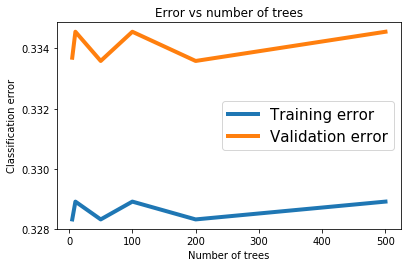

In [60]:
plt.plot([5, 10, 50, 100, 200, 500], training_errors, linewidth=4.0, label='Training error')
plt.plot([5, 10, 50, 100, 200, 500], val_errors, linewidth=4.0, label='Validation error')

make_figure(dim=(10,5), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')